# Assignment 3

Lucas Bezerra, ID: 171412, lucas.camaradantasbezerra@kaust.edu.sa

### Problem 1: Recurrent Neural Network

<strong>a. (10 points) LSTM contains a forget gate to decide how many previous
information need to be kept. There is a Sigmoid activation in the forget gate.
Explain why we use Sigmoid here, instead of Tanh.</strong>

Both the sigmoid $\sigma(x)$ and hyperbolic tangent $\text{tanh}(x)$ functions have 2 horizontal asymptotes as $x\to\pm\infty$. However, as $x\to -\infty$, $\sigma(x)\to 0$ while $\text{tanh}(x)\to -1$. Forgetting information is equivalent to multiplying it by zero, and as the sigmoid function has a larger domain that maps to zero than tanh, it is more fit for the forget gate.

<strong>b. (10 points) In neural language processing and many other fields that
process sequential data, more and more LSTM-based models are replaced by
Transformer-based models [2] nowadays. Why LSTM is not as popular as before
now? List at least 2 drawbacks of LSTM-compared to Transformer. Explain
each of them with 1 to 3 sentences.</strong>

- LSTMs tend to attend more to recent samples and forget older ones, while a transformer computes the attention between all pairs of samples equally, no matter how further apart they are. This allows transformers to have better performance for longer sequences.
- Transformers are highly-parallelizable, since they rely mostly on matrix multiplications, an operation that is implemented very efficiently in specialized hardware (e.g. GPUs), while LSTMs process sequences in a sequential fashion.

### Problem 2: DCGAN

<strong>In this coding assignment, you need to implement the discriminator of the DCGAN (and maybe tune some hyperparameters
 like the learning rates and the number of epochs)
to make your model generates some MNIST numbers. You can find a basic draft of the discriminator in the model.py
file. Fill the draft and train the model.</strong>

In [1]:
import torch
import torch.nn as nn

import torchvision.transforms as transforms
import torch.utils.data as data_utils
from torchvision.datasets.mnist import MNIST

from model import Generator, Discriminator
from train import train_DCGAN

device = torch.device("cuda" if torch.cuda.is_available()  else "cpu")

Hyperparameters are listed here. You maybe need to play a little bit with.

In [2]:
g_lr = 0.002
d_lr = 0.0002
batch_size = 128
num_epochs = 10

In [3]:
trans = transforms.Compose([
            transforms.Scale(32),
            transforms.ToTensor(),
            transforms.Normalize((0.5, ), (0.5, )),
        ])

train_set = MNIST(root='.', train=True, transform=trans, download=True)
train_loader = data_utils.DataLoader(train_set, batch_size=batch_size, shuffle=True)


/home/camaral/miniconda3/envs/torch_env/lib/python3.9/site-packages/torchvision/transforms/transforms.py:317: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


[0/10][0/469]	Loss_D: 1.4894	Loss_G: 2.0794	D(x): 0.4832	D(G(z)): 0.5209 / 0.1322
[0/10][50/469]	Loss_D: 0.0254	Loss_G: 6.8221	D(x): 0.9806	D(G(z)): 0.0017 / 0.0018
[0/10][100/469]	Loss_D: 0.7863	Loss_G: 2.4228	D(x): 0.6740	D(G(z)): 0.2126 / 0.1210
[0/10][150/469]	Loss_D: 0.9886	Loss_G: 2.3011	D(x): 0.7021	D(G(z)): 0.4365 / 0.1193
[0/10][200/469]	Loss_D: 1.1773	Loss_G: 1.0530	D(x): 0.4946	D(G(z)): 0.2879 / 0.3956
[0/10][250/469]	Loss_D: 1.0996	Loss_G: 1.0415	D(x): 0.4291	D(G(z)): 0.1751 / 0.3747
[0/10][300/469]	Loss_D: 1.0951	Loss_G: 1.0700	D(x): 0.5994	D(G(z)): 0.4123 / 0.3661
[0/10][350/469]	Loss_D: 1.0400	Loss_G: 1.9439	D(x): 0.7008	D(G(z)): 0.4706 / 0.1630
[0/10][400/469]	Loss_D: 1.1644	Loss_G: 1.3468	D(x): 0.5098	D(G(z)): 0.3493 / 0.2864
[0/10][450/469]	Loss_D: 1.2152	Loss_G: 2.9603	D(x): 0.8728	D(G(z)): 0.6373 / 0.0584


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


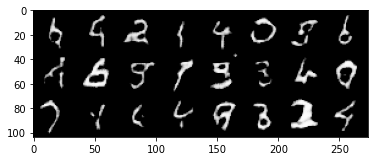

[1/10][0/469]	Loss_D: 1.0676	Loss_G: 0.8428	D(x): 0.5174	D(G(z)): 0.3055 / 0.4454
[1/10][50/469]	Loss_D: 1.2243	Loss_G: 0.3761	D(x): 0.4053	D(G(z)): 0.1999 / 0.6966
[1/10][100/469]	Loss_D: 0.9404	Loss_G: 1.3727	D(x): 0.6764	D(G(z)): 0.3996 / 0.2743
[1/10][150/469]	Loss_D: 0.9237	Loss_G: 1.4965	D(x): 0.6553	D(G(z)): 0.3687 / 0.2432
[1/10][200/469]	Loss_D: 0.8627	Loss_G: 1.2963	D(x): 0.6568	D(G(z)): 0.3371 / 0.2902
[1/10][250/469]	Loss_D: 0.8711	Loss_G: 0.9380	D(x): 0.5899	D(G(z)): 0.2574 / 0.4112
[1/10][300/469]	Loss_D: 0.8622	Loss_G: 0.6606	D(x): 0.5327	D(G(z)): 0.1588 / 0.5429
[1/10][350/469]	Loss_D: 1.1396	Loss_G: 1.7920	D(x): 0.8051	D(G(z)): 0.5608 / 0.1859
[1/10][400/469]	Loss_D: 0.7957	Loss_G: 1.6884	D(x): 0.7797	D(G(z)): 0.3973 / 0.2076
[1/10][450/469]	Loss_D: 0.8669	Loss_G: 1.4055	D(x): 0.5940	D(G(z)): 0.2669 / 0.2690


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


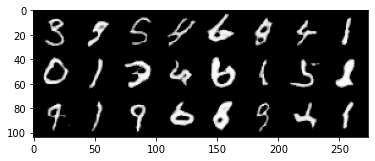

[2/10][0/469]	Loss_D: 0.8141	Loss_G: 1.7119	D(x): 0.6412	D(G(z)): 0.2736 / 0.2025
[2/10][50/469]	Loss_D: 0.4229	Loss_G: 2.2841	D(x): 0.7462	D(G(z)): 0.1070 / 0.1235
[2/10][100/469]	Loss_D: 0.5890	Loss_G: 1.4007	D(x): 0.7339	D(G(z)): 0.2248 / 0.2746
[2/10][150/469]	Loss_D: 0.4156	Loss_G: 2.9330	D(x): 0.8073	D(G(z)): 0.1657 / 0.0632
[2/10][200/469]	Loss_D: 0.3134	Loss_G: 2.1904	D(x): 0.8106	D(G(z)): 0.0888 / 0.1368
[2/10][250/469]	Loss_D: 0.1811	Loss_G: 3.0118	D(x): 0.9281	D(G(z)): 0.0977 / 0.0616
[2/10][300/469]	Loss_D: 0.8269	Loss_G: 1.6960	D(x): 0.7566	D(G(z)): 0.3941 / 0.2113
[2/10][350/469]	Loss_D: 0.3405	Loss_G: 2.5212	D(x): 0.8941	D(G(z)): 0.1921 / 0.0972
[2/10][400/469]	Loss_D: 0.1334	Loss_G: 3.7991	D(x): 0.9561	D(G(z)): 0.0811 / 0.0302
[2/10][450/469]	Loss_D: 0.0863	Loss_G: 3.6873	D(x): 0.9387	D(G(z)): 0.0214 / 0.0317


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


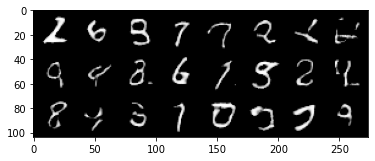

[3/10][0/469]	Loss_D: 0.0762	Loss_G: 3.5921	D(x): 0.9665	D(G(z)): 0.0402 / 0.0354
[3/10][50/469]	Loss_D: 0.6421	Loss_G: 1.4834	D(x): 0.7674	D(G(z)): 0.2781 / 0.2622
[3/10][100/469]	Loss_D: 0.8958	Loss_G: 0.9257	D(x): 0.5717	D(G(z)): 0.2366 / 0.4361
[3/10][150/469]	Loss_D: 0.1364	Loss_G: 4.2056	D(x): 0.9094	D(G(z)): 0.0378 / 0.0190
[3/10][200/469]	Loss_D: 0.5344	Loss_G: 2.3049	D(x): 0.8104	D(G(z)): 0.2499 / 0.1199
[3/10][250/469]	Loss_D: 0.1801	Loss_G: 3.3622	D(x): 0.8765	D(G(z)): 0.0424 / 0.0420
[3/10][300/469]	Loss_D: 0.0929	Loss_G: 3.3767	D(x): 0.9449	D(G(z)): 0.0340 / 0.0439
[3/10][350/469]	Loss_D: 0.0541	Loss_G: 3.8783	D(x): 0.9685	D(G(z)): 0.0213 / 0.0295
[3/10][400/469]	Loss_D: 0.0343	Loss_G: 5.4895	D(x): 0.9700	D(G(z)): 0.0033 / 0.0062
[3/10][450/469]	Loss_D: 0.0330	Loss_G: 4.8299	D(x): 0.9837	D(G(z)): 0.0162 / 0.0119


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


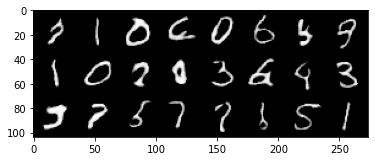

[4/10][0/469]	Loss_D: 0.0185	Loss_G: 5.3909	D(x): 0.9864	D(G(z)): 0.0046 / 0.0065
[4/10][50/469]	Loss_D: 0.7871	Loss_G: 1.7594	D(x): 0.7632	D(G(z)): 0.3596 / 0.2080
[4/10][100/469]	Loss_D: 0.6076	Loss_G: 1.9719	D(x): 0.8406	D(G(z)): 0.3004 / 0.1878
[4/10][150/469]	Loss_D: 0.9435	Loss_G: 0.4707	D(x): 0.4728	D(G(z)): 0.0671 / 0.6535
[4/10][200/469]	Loss_D: 0.1521	Loss_G: 3.2429	D(x): 0.9431	D(G(z)): 0.0857 / 0.0504
[4/10][250/469]	Loss_D: 0.0493	Loss_G: 4.0697	D(x): 0.9769	D(G(z)): 0.0249 / 0.0236
[4/10][300/469]	Loss_D: 0.0679	Loss_G: 4.3296	D(x): 0.9788	D(G(z)): 0.0442 / 0.0209
[4/10][350/469]	Loss_D: 0.0262	Loss_G: 5.0589	D(x): 0.9833	D(G(z)): 0.0091 / 0.0091
[4/10][400/469]	Loss_D: 0.0197	Loss_G: 4.9837	D(x): 0.9876	D(G(z)): 0.0071 / 0.0103
[4/10][450/469]	Loss_D: 0.0392	Loss_G: 5.2907	D(x): 0.9742	D(G(z)): 0.0127 / 0.0083


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


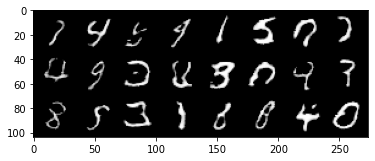

[5/10][0/469]	Loss_D: 0.0177	Loss_G: 4.7827	D(x): 0.9920	D(G(z)): 0.0096 / 0.0123
[5/10][50/469]	Loss_D: 1.8932	Loss_G: 1.0548	D(x): 0.2151	D(G(z)): 0.0944 / 0.4245
[5/10][100/469]	Loss_D: 0.8223	Loss_G: 1.7570	D(x): 0.7578	D(G(z)): 0.3714 / 0.2024
[5/10][150/469]	Loss_D: 1.2166	Loss_G: 2.4394	D(x): 0.9308	D(G(z)): 0.6299 / 0.1370
[5/10][200/469]	Loss_D: 0.5003	Loss_G: 2.0547	D(x): 0.7877	D(G(z)): 0.2010 / 0.1709
[5/10][250/469]	Loss_D: 0.5839	Loss_G: 1.8268	D(x): 0.7475	D(G(z)): 0.2227 / 0.2129
[5/10][300/469]	Loss_D: 1.2121	Loss_G: 4.6890	D(x): 0.9942	D(G(z)): 0.6444 / 0.0148
[5/10][350/469]	Loss_D: 0.8575	Loss_G: 1.6127	D(x): 0.5386	D(G(z)): 0.1279 / 0.2536
[5/10][400/469]	Loss_D: 0.0730	Loss_G: 4.0252	D(x): 0.9741	D(G(z)): 0.0446 / 0.0243
[5/10][450/469]	Loss_D: 0.0307	Loss_G: 4.6779	D(x): 0.9855	D(G(z)): 0.0158 / 0.0147


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


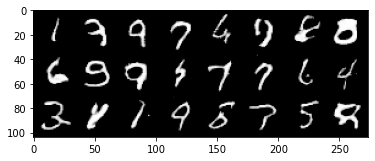

[6/10][0/469]	Loss_D: 0.0222	Loss_G: 5.1047	D(x): 0.9838	D(G(z)): 0.0057 / 0.0086
[6/10][50/469]	Loss_D: 0.0224	Loss_G: 4.7892	D(x): 0.9903	D(G(z)): 0.0124 / 0.0135
[6/10][100/469]	Loss_D: 0.0217	Loss_G: 4.9320	D(x): 0.9907	D(G(z)): 0.0122 / 0.0100
[6/10][150/469]	Loss_D: 0.0293	Loss_G: 5.8731	D(x): 0.9855	D(G(z)): 0.0145 / 0.0041
[6/10][200/469]	Loss_D: 0.0114	Loss_G: 6.0870	D(x): 0.9916	D(G(z)): 0.0029 / 0.0040
[6/10][250/469]	Loss_D: 0.0191	Loss_G: 5.4815	D(x): 0.9876	D(G(z)): 0.0064 / 0.0059
[6/10][300/469]	Loss_D: 0.0211	Loss_G: 5.2059	D(x): 0.9870	D(G(z)): 0.0071 / 0.0090
[6/10][350/469]	Loss_D: 0.0161	Loss_G: 5.8369	D(x): 0.9934	D(G(z)): 0.0094 / 0.0046
[6/10][400/469]	Loss_D: 0.0081	Loss_G: 5.3263	D(x): 0.9963	D(G(z)): 0.0044 / 0.0075
[6/10][450/469]	Loss_D: 1.0398	Loss_G: 1.1133	D(x): 0.6155	D(G(z)): 0.3859 / 0.3642


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


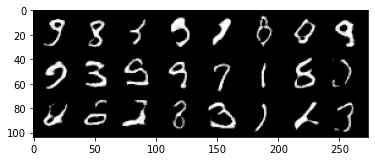

[7/10][0/469]	Loss_D: 0.9130	Loss_G: 1.0808	D(x): 0.5740	D(G(z)): 0.2497 / 0.3803
[7/10][50/469]	Loss_D: 0.6351	Loss_G: 1.7328	D(x): 0.7332	D(G(z)): 0.2391 / 0.2326
[7/10][100/469]	Loss_D: 0.8872	Loss_G: 1.0149	D(x): 0.5747	D(G(z)): 0.2060 / 0.4348
[7/10][150/469]	Loss_D: 0.7901	Loss_G: 2.2930	D(x): 0.6239	D(G(z)): 0.1690 / 0.1550
[7/10][200/469]	Loss_D: 2.9371	Loss_G: 2.0827	D(x): 0.9843	D(G(z)): 0.8938 / 0.1753
[7/10][250/469]	Loss_D: 1.0269	Loss_G: 0.9964	D(x): 0.5188	D(G(z)): 0.1994 / 0.4225
[7/10][300/469]	Loss_D: 0.5339	Loss_G: 1.2842	D(x): 0.7220	D(G(z)): 0.1628 / 0.3314
[7/10][350/469]	Loss_D: 0.0455	Loss_G: 4.6203	D(x): 0.9742	D(G(z)): 0.0184 / 0.0139
[7/10][400/469]	Loss_D: 0.0371	Loss_G: 5.7416	D(x): 0.9680	D(G(z)): 0.0033 / 0.0057
[7/10][450/469]	Loss_D: 0.0213	Loss_G: 5.1867	D(x): 0.9919	D(G(z)): 0.0128 / 0.0086


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


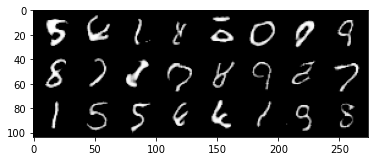

[8/10][0/469]	Loss_D: 0.0119	Loss_G: 6.0868	D(x): 0.9929	D(G(z)): 0.0047 / 0.0046
[8/10][50/469]	Loss_D: 0.0116	Loss_G: 5.3873	D(x): 0.9939	D(G(z)): 0.0054 / 0.0068
[8/10][100/469]	Loss_D: 0.0070	Loss_G: 6.3352	D(x): 0.9956	D(G(z)): 0.0026 / 0.0030
[8/10][150/469]	Loss_D: 0.0124	Loss_G: 6.0810	D(x): 0.9928	D(G(z)): 0.0051 / 0.0036
[8/10][200/469]	Loss_D: 0.0104	Loss_G: 6.3606	D(x): 0.9958	D(G(z)): 0.0062 / 0.0026
[8/10][250/469]	Loss_D: 0.0066	Loss_G: 5.8429	D(x): 0.9971	D(G(z)): 0.0037 / 0.0045
[8/10][300/469]	Loss_D: 0.0076	Loss_G: 6.0237	D(x): 0.9943	D(G(z)): 0.0018 / 0.0037
[8/10][350/469]	Loss_D: 0.0175	Loss_G: 5.3392	D(x): 0.9988	D(G(z)): 0.0160 / 0.0085
[8/10][400/469]	Loss_D: 0.4796	Loss_G: 3.9359	D(x): 0.7677	D(G(z)): 0.1610 / 0.0404
[8/10][450/469]	Loss_D: 0.7293	Loss_G: 2.0156	D(x): 0.7742	D(G(z)): 0.3329 / 0.1736


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


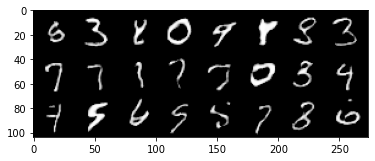

[9/10][0/469]	Loss_D: 0.7685	Loss_G: 1.1396	D(x): 0.5732	D(G(z)): 0.1190 / 0.3664
[9/10][50/469]	Loss_D: 0.6723	Loss_G: 0.9618	D(x): 0.7179	D(G(z)): 0.2165 / 0.4534
[9/10][100/469]	Loss_D: 0.1922	Loss_G: 3.3984	D(x): 0.9420	D(G(z)): 0.1170 / 0.0500
[9/10][150/469]	Loss_D: 0.9341	Loss_G: 4.3126	D(x): 0.9009	D(G(z)): 0.5009 / 0.0219
[9/10][200/469]	Loss_D: 0.4724	Loss_G: 3.5492	D(x): 0.8973	D(G(z)): 0.2787 / 0.0505
[9/10][250/469]	Loss_D: 0.0783	Loss_G: 3.3223	D(x): 0.9672	D(G(z)): 0.0422 / 0.0479
[9/10][300/469]	Loss_D: 0.6476	Loss_G: 1.6899	D(x): 0.6288	D(G(z)): 0.1120 / 0.2530
[9/10][350/469]	Loss_D: 0.0521	Loss_G: 4.5965	D(x): 0.9711	D(G(z)): 0.0221 / 0.0150
[9/10][400/469]	Loss_D: 0.0215	Loss_G: 5.1516	D(x): 0.9869	D(G(z)): 0.0082 / 0.0085
[9/10][450/469]	Loss_D: 0.0189	Loss_G: 4.8120	D(x): 0.9947	D(G(z)): 0.0133 / 0.0138


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


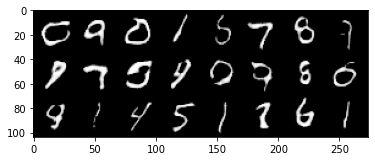

In [4]:
# The training part. Due to the easy dataset and simplified model structure, the training is relatively fast.
# In my case (Single Titan RTX) the training is finished in about 10 minutes.
# You may need to balance the training of generator and discriminator (e.g. by tuning their learning rates) to
# avoid a discriminator that is much stronger than the generator during training


G = Generator().to(device)
D = Discriminator().to(device)

optim_G = torch.optim.Adam(G.parameters(), lr=g_lr, betas=(0.5, 0.999))
optim_D = torch.optim.Adam(D.parameters(), lr=d_lr, betas=(0.5, 0.999))

loss_f = nn.BCELoss()

train_DCGAN(G, D, optim_G, optim_D, loss_f, train_loader, num_epochs, device)

### Problem 3: Mode Collapse

<strong>a. (5 points) Explain the mode collapse problem happens in GANs in 2-3
sentences.</strong></strong>

<!-- The generator loss in a traditional GAN is given by:

$$ L_G(\theta,\phi) = -\mathbb{E}_{z\sim \mathcal{N}(0,I)}\left[ \text{log}(D_\phi(G_\theta(z)))\right]$$ -->

The generator tries to create images that trick the discriminator into thinking they're true. The simplest way to do it is to generate images that cover only part of the domain of real images, not the whole domain, which is known as mode collapse. Since those images are still valid, they trick the generator and thus minimize the loss, but in an unintended way.

<strong>b. (10 points) UnRolled GAN [4] alleviates the mode collapse problem of GAN training by forecasting the future K steps of which networks? Explain your choice in 1-2 sentences. A. Generator B. Discriminator</strong>

<!-- ----------------------------- TO DO -->

Discriminator, as it should be made stronger than the generator from the beginning, since for the generator to learn properly it needs a discriminator that can at least tell real data from fake. The discriminator learns much faster, and thus the generator cannot overfit to a specific discriminator, having to resemble real data as much as it can, and thus avoiding mode collapse.

<strong>c. (10 points) MAD-GAN [5] uses several generators to alleviate the mode collapse problem. Given a fake data, the discriminator needs to recognize the generator that produces it. Why this helps to alleviate the mode collapse problem?</strong>

The intuition behind the use of multiple generators is to encourage each of them to generate images from a single mode. The goal is to encourage "mode collapse" generation-wise, but to collectively cover all the modes of the dataset. 

<strong>d. (15 points) Wasserstein GAN [6, 7] is designed to train the generator by minimizing the Wasserstein distance (AKA earth mover’s distance) between the real data distribution and generated data distribution. WGAN helps stable the training of GAN and alleviate the mode collapse issue. Explain why Wasserstein distance is better than KL/JS divergence when there is no overlap between 2 distributions? How was this notion used to develop the Wasserstein GAN Discriminator D and Generator G losses compared to standard GAN.</strong>



When there is no overlap between distributions, both the KL and JS divergence metrics saturate to their maxima, at which point their gradient is nearly zero. The Wassertein distance, however, does not saturate, and thus works better with gradient descent optimizers. 

Since it is not trivial to compute the Wassertein distance in its original form, the Kantorovich-Rubinstein duality is used to rewrite it as:

$$ W(\mathbb{P}_r, \mathbb{P}_\theta) = \text{sup} \; \mathbb{E}_{x\sim\mathbb{P}_r}\left[ f(x) \right] - \mathbb{E}_{x\sim\mathbb{P}_\theta}\left[ f(x) \right] $$

Where $f(\cdot)$ is a 1-Lipschitz function. In WGANs, $f(\cdot)$ is simply the output of the discriminator, without a softmax, with weight clipping (to ensure the Lipschitz condition). 

The discriminator objective is to maximize the Wassertein distance between the discriminator outputs as functions of real and fake data, meaning it can successfully tell them apart, giving real data higher outputs than fake data. The generator's is to maximize the expected discriminator output given fake data, or to trick the discriminator into thinking they're real ones.